# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP at THE SPARKS FOUNDATION

# GRIP JUNE-2021

# Author: Shibbir Ahmed Arif

# Task 03: Exploratory Data Analysis - Retail

# Objective:
    
● Performing Exploratory Data Analysis on dataset

● Finding out the weak areas where more profits can be made

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

# Import the dataset

In [3]:
data = pd.read_csv("C:\\Users\\user\\Documents\\DSBA Task\\Task 03 - Exploratory Data Analysis - Retail\\SampleSuperstore.csv")
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
data.shape

(9994, 13)

In [5]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
#Finding for missing values

data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
#Finding for duplicate values

data.duplicated().sum()

17

In [8]:
#dropping duplicate values

data.drop_duplicates(inplace=True)
data.shape

(9977, 13)

In [9]:
#getting rid of excess data

data.drop("Postal Code",axis=1,inplace=True)

In [10]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [11]:
print(f'Total Sales ${int(data["Sales"].sum())}')
print(f'Total Profits ${int(data["Profit"].sum())}')

Total Sales $2296195
Total Profits $286241


# EXPLORATORY DATA ANALYSIS

# Dataset Visualization

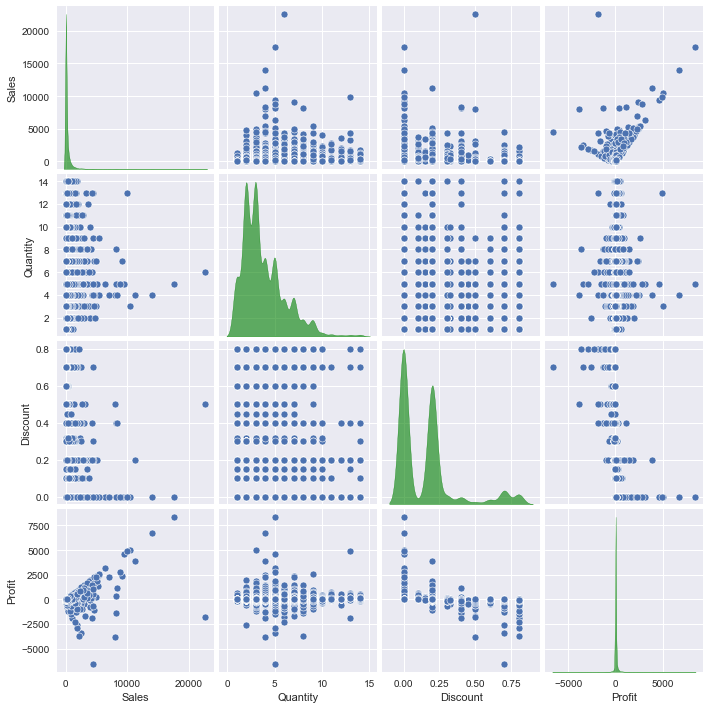

In [12]:
sns.pairplot(data,diag_kind="kde",diag_kws={"color":"green","alpha":0.6});

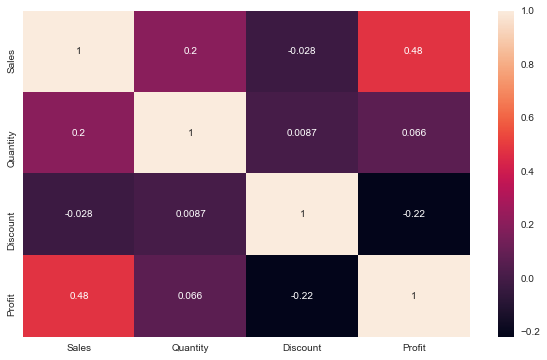

In [13]:
#Finding the pairwise correlation between the columns and visualizing using heatmaps
data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True);

It shows a negative correlation between Profit and Discount 

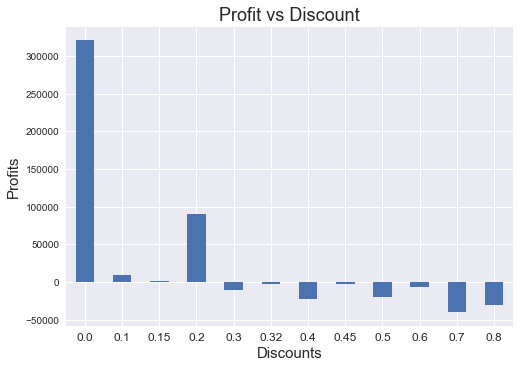

In [15]:
#counting total profits by several categories

profit_by_dis=data.groupby("Discount")["Profit"].sum()

#visualizing data


plt.figure()
profit_by_dis.plot(kind="bar")
plt.title("Profit vs Discount",fontsize=18)
plt.xlabel("Discounts",fontsize=15)
plt.ylabel("Profits",fontsize=15)
plt.xticks(rotation=0,fontsize=12)
plt.show()

It shows Profits turn negative when discount is greater than 0.2

# Analyzing sales and profits by ship modes

In [16]:
#computing sales for several ship modes 
sales_by_ship_mode=data.groupby("Ship Mode")["Sales"].sum().nlargest(100)

#computing profits for several ship modes
profit_by_ship_mode=data.groupby("Ship Mode")["Profit"].sum().nlargest(100)

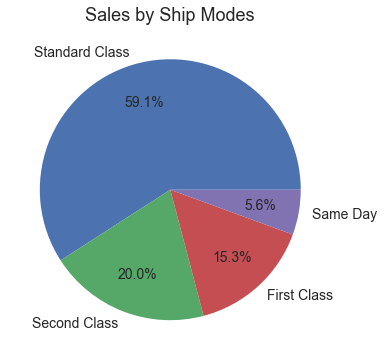

In [17]:
#visualizing sales quantity in pie chart

ax,pie=plt.subplots(figsize=[10,6])
plt.pie(sales_by_ship_mode,labels=sales_by_ship_mode.index,autopct="%0.1f%%",pctdistance=0.7,textprops={'fontsize': 14})
plt.title("Sales by Ship Modes",fontsize=18);
plt.show()

It shows most of the sales come from Standard class ship mode

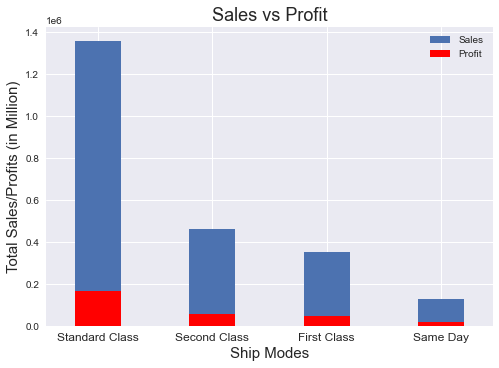

In [18]:
#visualizing sales and profits in bar chart

plt.figure()
sales_by_ship_mode.plot(kind="bar",width=.4)
profit_by_ship_mode.plot(kind="bar",width=.4,color="red")
plt.title("Sales vs Profit",fontsize=18)
plt.ylabel("Total Sales/Profits (in Million)",fontsize=15)
plt.xlabel("Ship Modes",fontsize=15)
plt.xticks(rotation = 0,fontsize=12)
plt.legend()

plt.show()

It shows high ratio between sales and profits in all ship modes

# Analyzing sales and profits by Categories

In [19]:
#computing sales for different categories
sales_by_category=data.groupby("Category")["Sales"].sum().nlargest(100)
#computing profits for different categories
profit_by_category=data.groupby("Category")["Profit"].sum().nlargest(100)

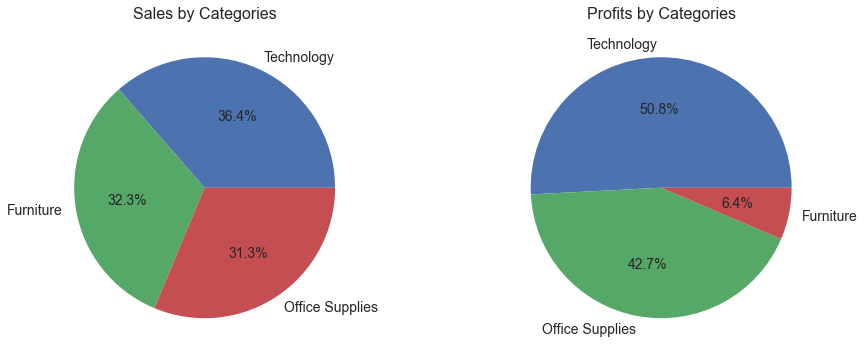

In [20]:
#Visualizing sales and profit in different pie charts

f = plt.figure(figsize=(15,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)



ax1.pie(sales_by_category,labels=sales_by_category.index,autopct="%.1f%%",textprops={'fontsize': 14})
ax1.set_title("Sales by Categories",fontsize=16)

ax2.pie(profit_by_category,labels=profit_by_category.index,autopct="%.1f%%",textprops={'fontsize': 14})
ax2.set_title("Profits by Categories",fontsize=16)
plt.show()

Note: The furniture category has sales percentage similar to the others, but profit percentage is much lesser than others

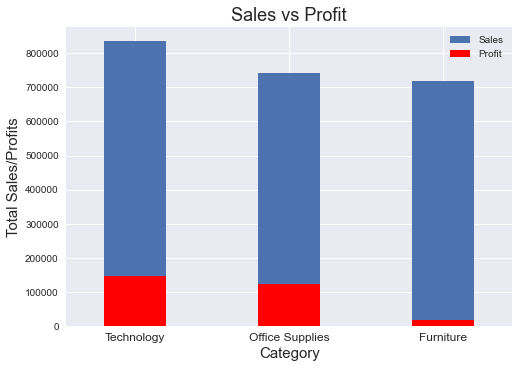

In [21]:
#creating a bar chart for visualizing sales vs profit


plt.figure()
sales_by_category.plot(kind="bar",width=.4)
profit_by_category.plot(kind="bar",width=.4,color="red")
plt.title("Sales vs Profit",fontsize=18)
plt.ylabel("Total Sales/Profits",fontsize=15)
plt.xlabel("Category",fontsize=15)
plt.xticks(rotation = 0,fontsize=12)
plt.legend()

plt.show()

In [22]:
for i in range(len(sales_by_category)):
    cat=(sales_by_category/profit_by_category).index[i]
    ratio=int((sales_by_category/profit_by_category).values[i])
    print(cat+" has sales and profit ratio of {}".format(ratio))

Furniture has sales and profit ratio of 40
Office Supplies has sales and profit ratio of 5
Technology has sales and profit ratio of 5


Note: Furniture category has less profit as compared to sales. The reason behind this is high sales and profit ratio.

# Analysing sales and profits by Sub-categories

In [23]:
#computing sales for different sub-categories
sales_by_subcategory=data.groupby("Sub-Category")["Sales"].sum().nlargest(100)

#computing profits for different sub-categories
profit_by_subcategory=data.groupby("Sub-Category")["Profit"].sum().nlargest(100)

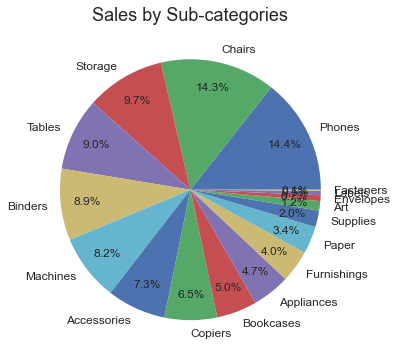

In [24]:
#creating a pie chart based on different sub-categories

ax,pie=plt.subplots(figsize=(10,6))
plt.pie(sales_by_subcategory,labels=sales_by_subcategory.index,autopct="%.1f%%",pctdistance=0.8,textprops={"fontsize":12})
plt.title("Sales by Sub-categories",fontsize=18)
plt.show()

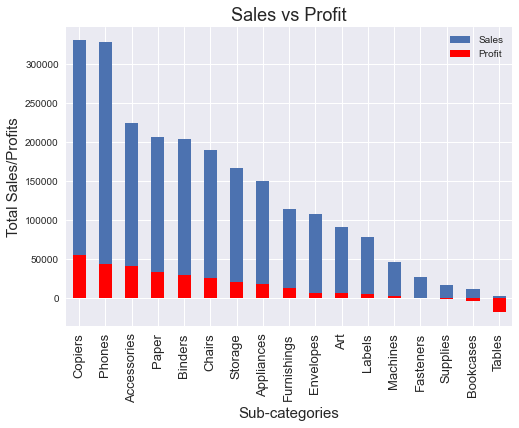

In [25]:
#creating a bar chart for visualizing sales vs profit

plt.figure()
sales_by_subcategory.plot(kind="bar")
profit_by_subcategory.plot(kind="bar",color="red")
plt.title("Sales vs Profit",fontsize=18)
plt.ylabel("Total Sales/Profits",fontsize=15)
plt.xlabel("Sub-categories",fontsize=15)
plt.xticks(fontsize=13)
plt.legend()
plt.show()

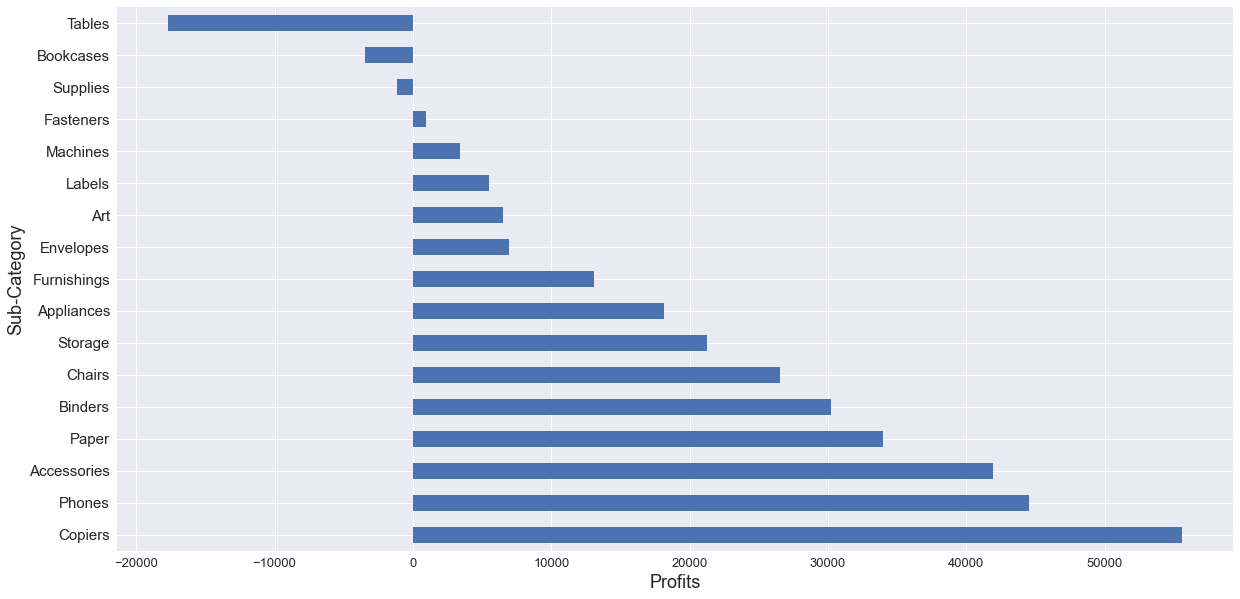

In [26]:
#A horizontal bar plot can be used to get a more detailed view on profits

plt.figure(figsize=(20,10))
profit_by_subcategory.plot.barh()
plt.ylabel("Sub-Category",fontsize=18)
plt.xlabel("Profits",fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)
plt.show()

Note: Tables, Book cases and Supplies sub-categories have negative profit 

# Analyzing sales and profits by Regions

In [27]:
#computing sales for different regions
sales_by_region=data.groupby("Region")["Sales"].sum().nlargest(100)

#computing sales for different regions
profits_by_region=data.groupby("Region")["Profit"].sum().nlargest(100)

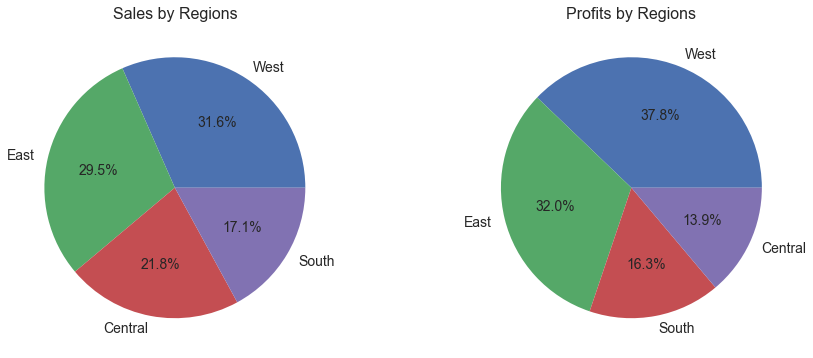

In [28]:
#Visualizing sales and profit in different pie charts

f = plt.figure(figsize=(15,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)



ax1.pie(sales_by_region,labels=sales_by_region.index,autopct="%.1f%%",textprops={'fontsize': 14})
ax1.set_title("Sales by Regions",fontsize=16)

ax2.pie(profits_by_region,labels=profits_by_region.index,autopct="%.1f%%",textprops={'fontsize': 14})
ax2.set_title("Profits by Regions",fontsize=16)
plt.show()

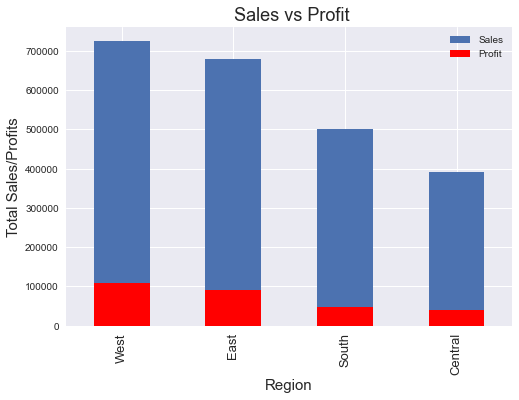

In [29]:
#creating a bar chart for visualizing sales vs profit
plt.figure()
sales_by_region.plot(kind="bar")
profits_by_region.plot(kind="bar",color="red")
plt.title(" Sales vs Profit",fontsize=18)
plt.ylabel("Total Sales/Profits",fontsize=15)
plt.xlabel("Region",fontsize=15)
plt.xticks(fontsize=13)
plt.legend()
plt.show()

Note: West region has the most sales and profits

# Analysing profits by States

In [31]:
#computing profits for different states
profits_by_states=data.groupby("State")["Profit"].sum().nlargest(100)

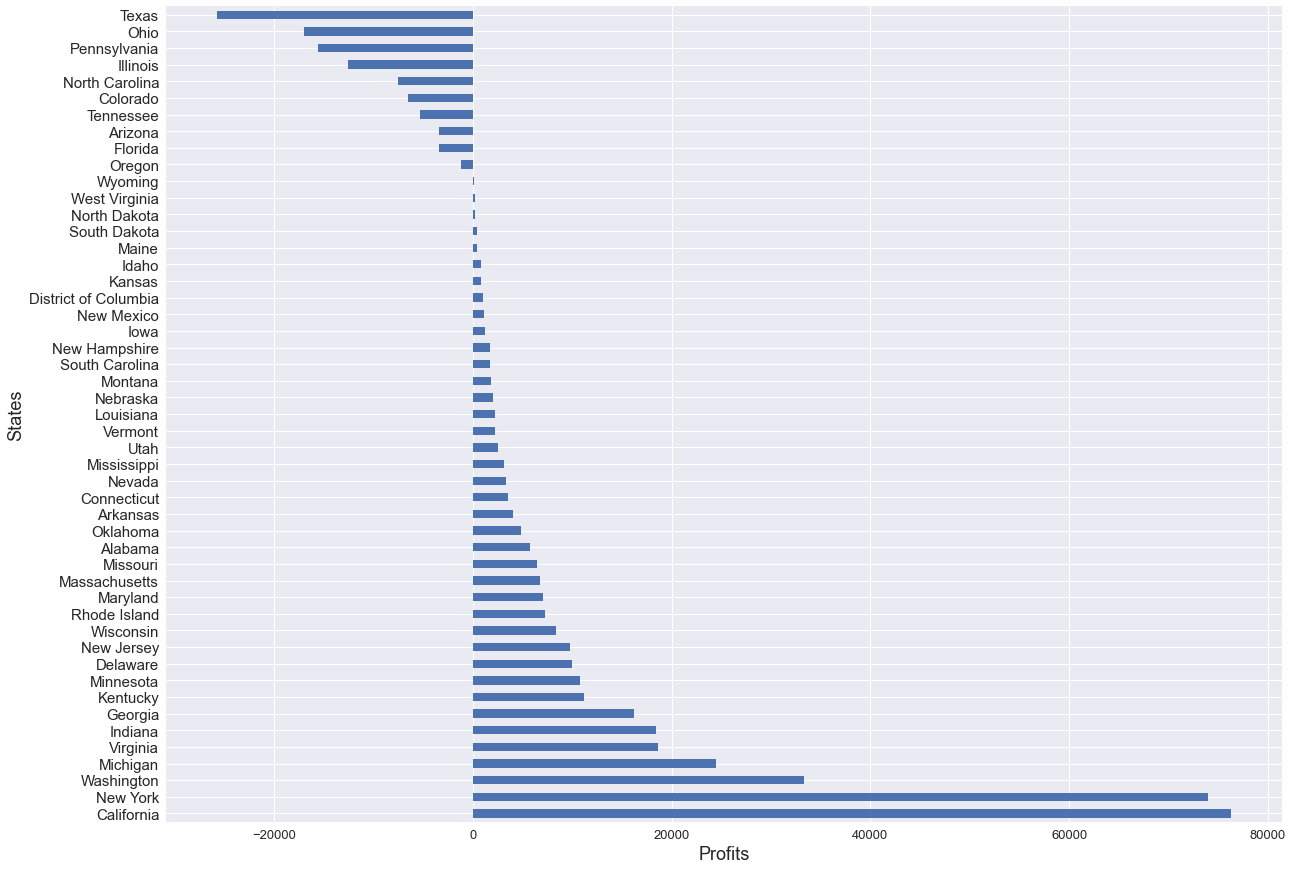

In [32]:
#A horizontal bar plot can be used to get a more detailed view on profits
plt.figure(figsize=(20,15))
profits_by_states.plot.barh()
plt.ylabel("States",fontsize=18)
plt.xlabel("Profits",fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)
plt.show()

Note: Texas,Ohio,Pennsylvania,Illinois,North california,Colorado,Tennessee,Arizona,Florida,Oregon have negative profits

# CONCLUSION

# The weak areas where one can work to make profits are:
    
1. The discount rate should not be greater than 0.2 as profits turn negative when the discount rate is greater than 0.2 .
2. In the category section, Furniture has less profits compared to sales .Technology and Office supplies have more profit . So sales of furnitures should be limited and sales of technology and office supplies should be increased.
3. In the sub-category sections items having negative profit should be limited in sales or discount rate shold be minimized.
4. South and central region has less profit. Sales should be increased in these regions to have more profit.
5. Sales and discount should be optimized in the states having negative profits.